# Baseline Models

1. Support Vector Classifier
2. Random Forest Classifier

Questions addressed:
    - to scale or not scale?
    - under/over-sampling techniques?

Objective: To address challenges posed by unique entry values and complexities of the N3C, this study aggregates and organizes variables relevant to diabetic re-hospitalization. Relevant features and data are used for diabetes management, employing minMaxScaler normalization for uniform feature scaling. Class labeling imbalance is addressed by dividing the dataset into two classes and balancing the sample dataset using under-sampling and stratified sampling

In [3]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading Dataset
df = pd.read_csv("../data/processed_diabetes_data.csv").drop('Unnamed: 0', axis=1)
df.dtypes

encounter_id                float64
patient_nbr                 float64
race                         object
gender                       object
age                         float64
weight                       object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital            float64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
glipizide                   

In [5]:
numerical_columns = df.select_dtypes(include=['float64']).astype(int).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns:")
print(numerical_columns)

print("\nObject (Categorical) Columns:")
print(object_columns)
object_columns = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=object_columns, dtype=int)

df.nunique()

Numerical Columns:
['encounter_id', 'patient_nbr', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']

Object (Categorical) Columns:
['race', 'gender', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed']


encounter_id              101763
patient_nbr                71515
age                           10
time_in_hospital              14
num_lab_procedures           118
                           ...  
glyburide-metformin_Up         2
change_Ch                      2
change_No                      2
diabetesMed_No                 2
diabetesMed_Yes                2
Length: 2249, dtype: int64

In [10]:
identifiers = ['encounter_id', 'patient_nbr']
label = ['readmitted']
X= df.drop(columns = ['readmitted', 'encounter_id', 'patient_nbr'])
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
## Support Vector Classifier

                precision    recall  f1-score   support

Not Readmitted       0.89      1.00      0.94     18084
    Readmitted       0.00      0.00      0.00      2269

      accuracy                           0.89     20353
     macro avg       0.44      0.50      0.47     20353
  weighted avg       0.79      0.89      0.84     20353



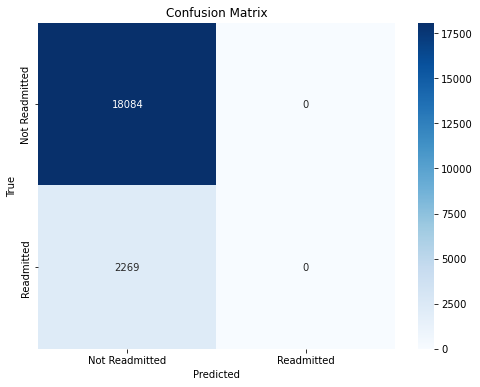

In [12]:
svc = SVC()
svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)

print(classification_report(y_test, svc_prediction, target_names=['Not Readmitted', 'Readmitted']))

conf_matrix = confusion_matrix(y_test, svc_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
scaled_X = preprocessing.MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

                precision    recall  f1-score   support

Not Readmitted       0.89      1.00      0.94     18084
    Readmitted       0.00      0.00      0.00      2269

      accuracy                           0.89     20353
     macro avg       0.44      0.50      0.47     20353
  weighted avg       0.79      0.89      0.84     20353



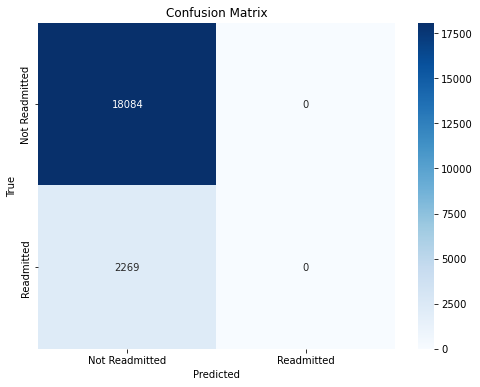

In [14]:
svc = SVC()
svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)

print(classification_report(y_test, svc_prediction, target_names=['Not Readmitted', 'Readmitted']))

conf_matrix = confusion_matrix(y_test, svc_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [6]:
## Random Forest Classifier

In [7]:
X= df.drop(columns = ['readmitted', 'encounter_id', 'patient_nbr'])
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

                precision    recall  f1-score   support

Not Readmitted       0.89      1.00      0.94     18084
    Readmitted       0.00      0.00      0.00      2269

      accuracy                           0.89     20353
     macro avg       0.44      0.50      0.47     20353
  weighted avg       0.79      0.89      0.84     20353



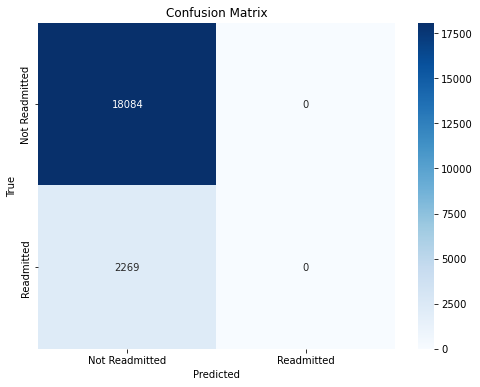

In [7]:
rf = RandomForestClassifier(n_estimators = 50, max_depth=5, random_state=43)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
print(classification_report(y_test, rf_prediction, target_names= ['Not Readmitted', 'Readmitted']))
conf_matrix = confusion_matrix(y_test, rf_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:
scaled_X = preprocessing.MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=42)

                precision    recall  f1-score   support

Not Readmitted       0.89      1.00      0.94     18084
    Readmitted       0.00      0.00      0.00      2269

      accuracy                           0.89     20353
     macro avg       0.44      0.50      0.47     20353
  weighted avg       0.79      0.89      0.84     20353



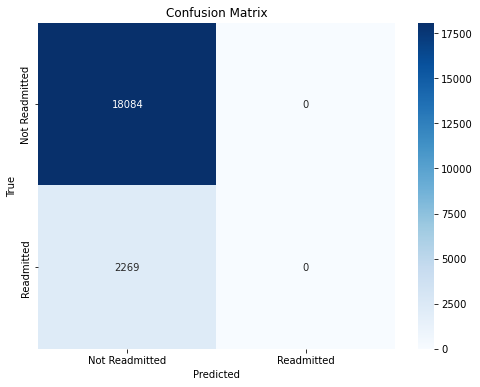

In [9]:
rf = RandomForestClassifier(n_estimators = 50, max_depth=5, random_state=43)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
print(classification_report(y_test, rf_prediction, target_names= ['Not Readmitted', 'Readmitted']))
conf_matrix = confusion_matrix(y_test, rf_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()